In [2]:
#Importing libraries
import networkx as nx
import simplejson as sjs
import json as js
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
from networkx.readwrite import json_graph

In [12]:
# def read_json_graph(filename):
#     with open(filename) as f:
#         graph_data = js.load(f)
#     return json_graph.node_link_graph(graph_data)

# Read the JSON file
# with open('../EDA/star-wars-network-data-master/starwars-episode-1-interactions.json') as f:
#     json_data = js.loads(f.read())

with open('../EDA/star-wars-network-data-master/starwars-episode-1-interactions_updated.json') as f:
    json_data_new = js.loads(f.read())

#j_graph = read_json_graph("../EDA/star-wars-network-data-master/starwars-episode-1-interactions.json")


In [13]:
# Instantiate the network Graph
G = nx.Graph()

# Derive the edges by crawling the nodes - Older version of JSON
# def crawl_old(jsdata):
#     tracker = {}
#     count = 0
#     for key, item in jsdata.items():
#         if isinstance(item, list):
#             for i in item:
#                 if "name" in i:
#                     tracker[i["name"]] = count
#                     count = count + 1
#                 elif "source" in i:
#                     val_list = list(tracker.values())
#                     key_list = list(tracker.keys())
#                     src_pos = val_list.index(i['source'])
#                     tgt_pos = val_list.index(i['target'])
#                     G.add_edge(key_list[src_pos], key_list[tgt_pos], weight = i['value'])

# Derive the edges by crawling the nodes - Newer version of JSON (Updated interactions JSON)
def crawl_new(jsdata):
    tracker = {}
    count = 0
    for key, item in jsdata.items():
        if isinstance(item, list):
            for i in item:
                if "id" in i:
                    tracker[i["id"]] = count
                    count = count + 1
                elif "source" in i:
                    G.add_edge(i['source'], i['target'], weight = i['value'])

# Crawl the JSON file
crawl_new(json_data_new)

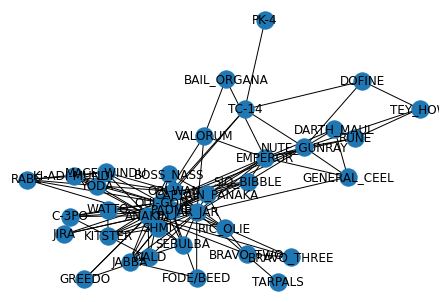

In [14]:
#Networkx plot using the draw function
nx.draw(G,with_labels=True)
#nx.edges(G)
#nx.nodes(G)

In [15]:
#Network Metrics for each episode
dgc = nx.degree_centrality(G) # degree of centrality
closeness = nx.closeness_centrality(G, u=None, distance=None) # closeness calculation
betweenness = nx.betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None) # betweenness calculation
evcentrality = nx.eigenvector_centrality(G, max_iter=100, tol=1e-06, nstart=None, weight='weight') # Eigen vector centrality calculation
nodes_list = nx.nodes(G)

#Converting to pandas dataframe
dgc_df = pd.DataFrame(list(dgc.items())).rename(columns={0: "character_name", 1: "degree_centrality"})
closeness_df = pd.DataFrame(list(closeness.items())).rename(columns={0: "character_name", 1: "closeness_centrality"})
betweenness_df = pd.DataFrame(list(betweenness.items())).rename(columns={0: "character_name", 1: "betweenness_centrality"})
evc_df = pd.DataFrame(list(evcentrality.items())).rename(columns={0: "character_name", 1: "eigenvector_centrality"})

#Build network metrics in a tabular format using pandas dataframe
dataframes = [dgc_df, closeness_df, betweenness_df, evc_df]
tabular_network_metrics = reduce(lambda left,right: pd.merge(left, right, on=['character_name'], how='inner'), dataframes)

tabular_network_metrics.style.highlight_max(color='blue')

,character_name,degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality
0,NUTE_GUNRAY,0.277778,0.553846,0.127969,0.019074
1,QUI-GON,0.694444,0.765957,0.319157,0.567911
2,PK-4,0.027778,0.336449,0.000000,0.000220
3,TC-14,0.138889,0.500000,0.075252,0.014507
4,OBI-WAN,0.361111,0.571429,0.046590,0.367194
5,DOFINE,0.083333,0.375000,0.001905,0.000517
6,RUNE,0.111111,0.391304,0.003757,0.004128
7,TEY_HOW,0.083333,0.367347,0.000794,0.000423
8,CAPTAIN_PANAKA,0.250000,0.545455,0.009766,0.213685
9,EMPEROR,0.305556,0.562500,0.102921,0.038495


In [16]:
tabular_network_metrics.style.background_gradient()

,character_name,degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality
0,NUTE_GUNRAY,0.277778,0.553846,0.127969,0.019074
1,QUI-GON,0.694444,0.765957,0.319157,0.567911
2,PK-4,0.027778,0.336449,0.000000,0.000220
3,TC-14,0.138889,0.500000,0.075252,0.014507
4,OBI-WAN,0.361111,0.571429,0.046590,0.367194
5,DOFINE,0.083333,0.375000,0.001905,0.000517
6,RUNE,0.111111,0.391304,0.003757,0.004128
7,TEY_HOW,0.083333,0.367347,0.000794,0.000423
8,CAPTAIN_PANAKA,0.250000,0.545455,0.009766,0.213685
9,EMPEROR,0.305556,0.562500,0.102921,0.038495


In [17]:
tabular_network_metrics.style.bar()

,character_name,degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality
0,NUTE_GUNRAY,0.277778,0.553846,0.127969,0.019074
1,QUI-GON,0.694444,0.765957,0.319157,0.567911
2,PK-4,0.027778,0.336449,0.000000,0.000220
3,TC-14,0.138889,0.500000,0.075252,0.014507
4,OBI-WAN,0.361111,0.571429,0.046590,0.367194
5,DOFINE,0.083333,0.375000,0.001905,0.000517
6,RUNE,0.111111,0.391304,0.003757,0.004128
7,TEY_HOW,0.083333,0.367347,0.000794,0.000423
8,CAPTAIN_PANAKA,0.250000,0.545455,0.009766,0.213685
9,EMPEROR,0.305556,0.562500,0.102921,0.038495
